stationariy

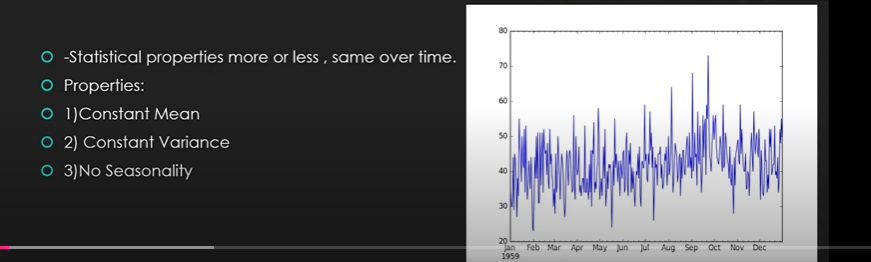

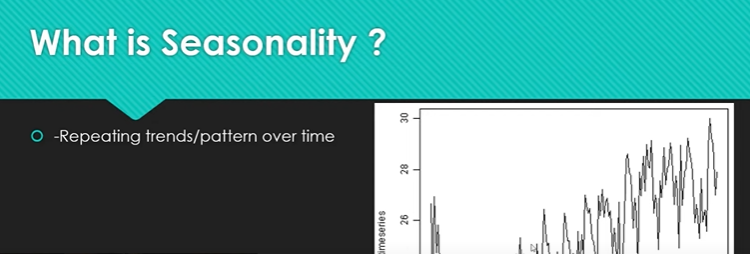

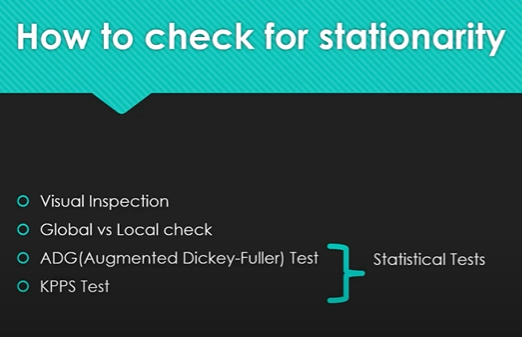

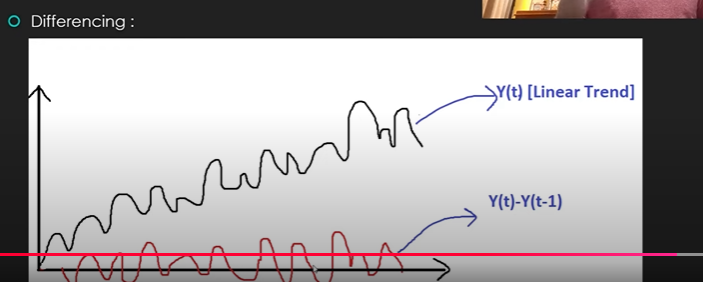

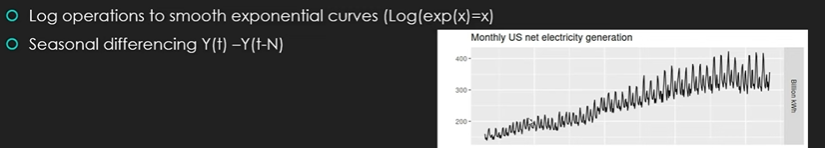

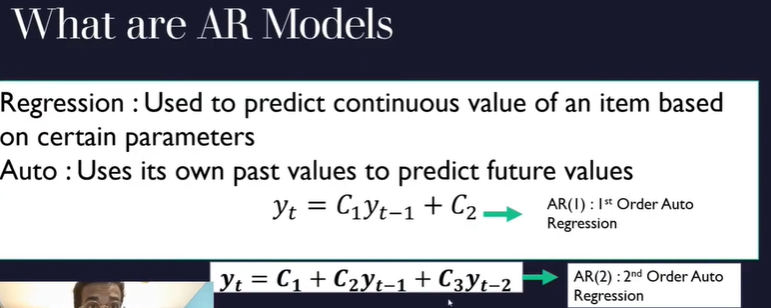

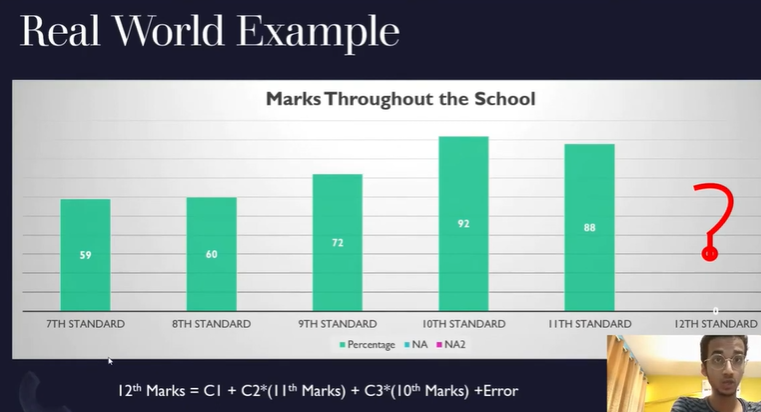

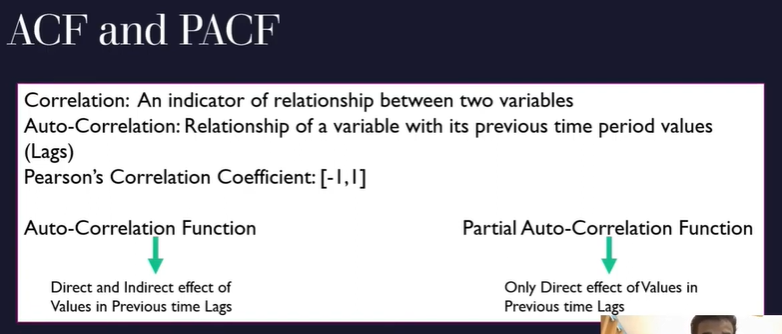

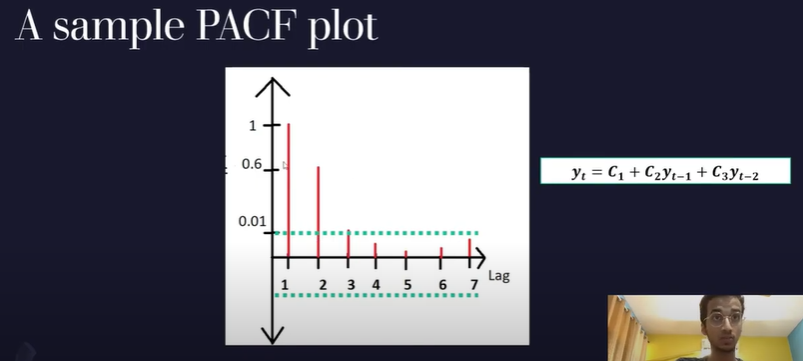

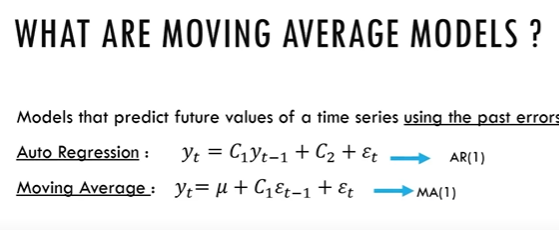

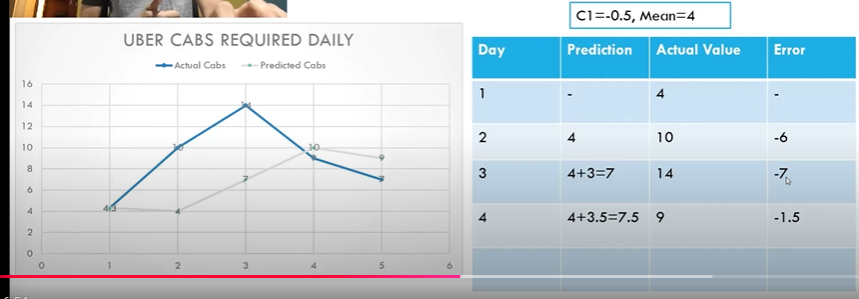

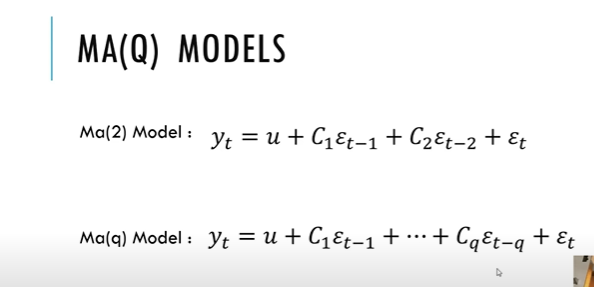

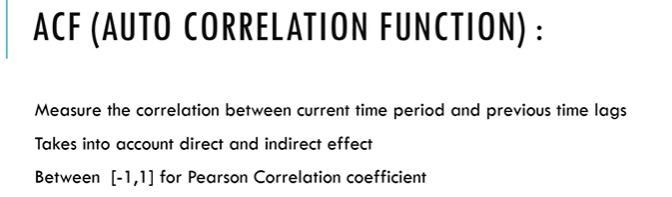

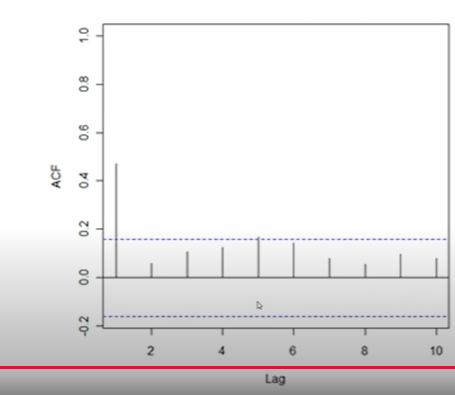

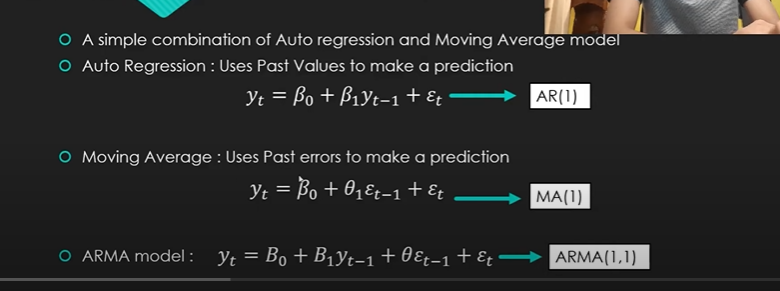

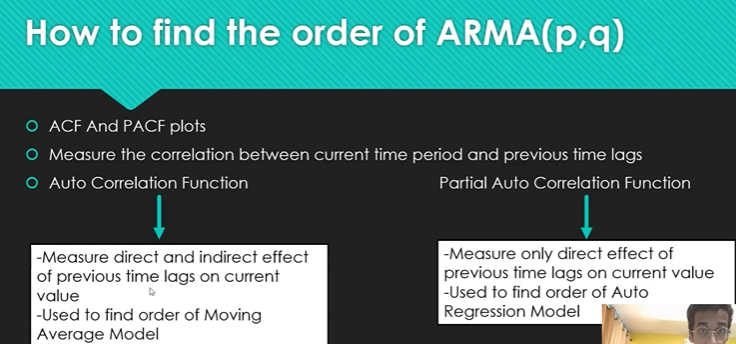

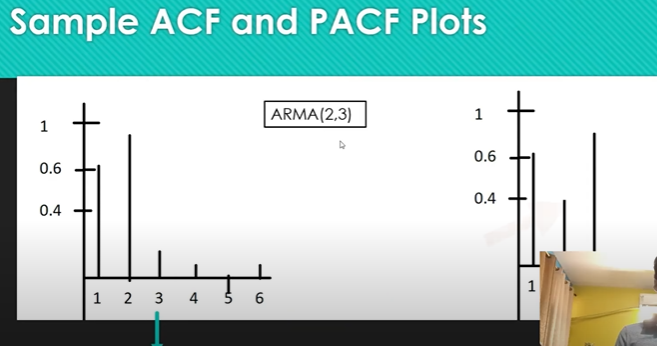

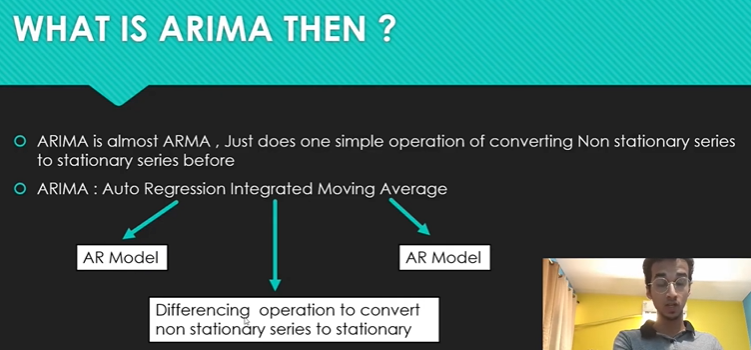

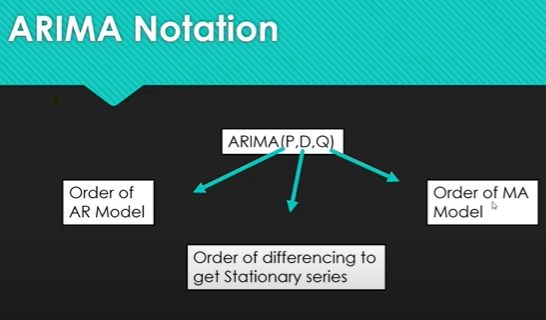

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


In [2]:
df = pd.read_csv("min_temp.csv")

In [138]:
df.head(10)

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
5,1/6/1981,15.8
6,1/7/1981,15.8
7,1/8/1981,17.4
8,1/9/1981,21.8
9,1/10/1981,20


In [3]:
df =df.rename(columns={'Daily minimum temperatures':'temp'})

In [4]:

df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   temp    3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


In [54]:
df.isna().sum()

Date    0
temp    0
dtype: int64

In [55]:
df.describe()

,Date
count,3650
mean,1985-12-31 07:12:00
min,1981-01-01 00:00:00
25%,1983-07-02 06:00:00
50%,1985-12-31 12:00:00
75%,1988-06-30 18:00:00
max,1990-12-31 00:00:00


In [56]:
df['temp'] = df['temp'].astype(float)

In [57]:
df.describe()

,Date,temp
count,3650,3650.000000
mean,1985-12-31 07:12:00,11.177753
min,1981-01-01 00:00:00,0.000000
25%,1983-07-02 06:00:00,8.300000
50%,1985-12-31 12:00:00,11.000000
75%,1988-06-30 18:00:00,14.000000
max,1990-12-31 00:00:00,26.300000
std,NaN,4.071837


In [58]:
x =df.values

In [59]:
x = x[:,1:]

In [60]:
x

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13.0]], dtype=object)

In [61]:
print('Shape of data \t', df.shape)
print('Origin of data \t',df.head(10))
print('After Extracting only temperature \t',x)

Shape of data 	 (3650, 2)
Origin of data 	         Date  temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8
5 1981-01-06  15.8
6 1981-01-07  15.8
7 1981-01-08  17.4
8 1981-01-09  21.8
9 1981-01-10  20.0
After Extracting only temperature 	 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13.0]]


In [ ]:
df.plot()

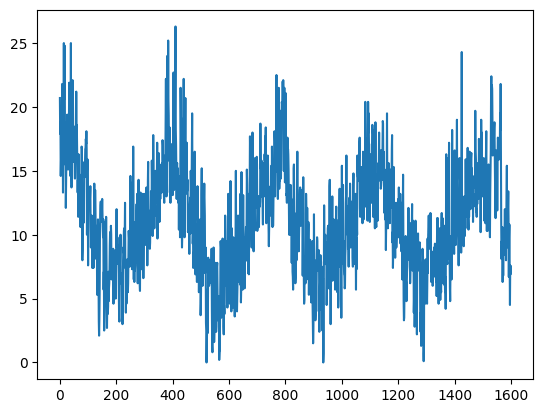

In [62]:
plt.plot(df.temp[:1600])

In [63]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Common Regex Patterns:
# Common Regex Patterns:
# . matches any single charactera
# ^ matches the start of a string
# $ matches the end of a string
# * matches 0 or more occurrences of the preceding element
# + matches 1 or more occurrences of the preceding element
# ? matches 0 or 1 occurrence of the preceding element
# {n} matches exactly n occurrences of the preceding element
# [abc] matches any character in the set (e.g., a, b, or c)
# | matches either the expression on the left or the right
# Regex Functions:
# re.search(pattern, string): Searches for the first occurrence of the pattern in the string
# re.match(pattern, string): Searches for the pattern at the beginning of the string
# re.findall(pattern, string): Returns all non-overlapping matches of the pattern in the string as a list of strings
# re.sub(pattern, repl, string): Replaces occurrences of the pattern in the string with the replacement string
# Example:
# Python
# import re

# string = "Hello, my phone number is 123-456-7890."

# pattern = r"\d{3}-\d{3}-\d{4}"

# match = re.search(pattern, string)

# if match:
#     print("Phone number found:", match.group())
# else:
#     print("No phone number found")



In [ ]:
df2 = pd.read_csv("min2.csv")

In [135]:
df2

,Date,temp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,?14.6
4,1/5/1981,15.8
5,1/6/1981,?15.8
6,1/7/1981,15.8
7,1/8/1981,17.4
8,1/9/1981,21.8


In [64]:
import re

In [113]:
for x in df2.temp:
    match = re.search(r'^\?', x)
    if match:
        df2.temp = df2.temp.replace(x, x[1:])
    

In [119]:
df2['temp'] = df2['temp'].apply(lambda x: x[1:] if re.search(r'^\?', x) else x)

In [121]:
df2['temp']

0    20.7
1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
6    15.8
7    17.4
8    21.8
Name: temp, dtype: object

In [116]:
df2

,Date,temp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
5,1/6/1981,15.8
6,1/7/1981,15.8
7,1/8/1981,17.4
8,1/9/1981,21.8


The Augmented Dickey-Fuller (ADF) test!
What is the ADF test?
The ADF test is a statistical test used to determine if a time series is stationary or not. Stationarity means that the statistical properties of the time series, such as the mean and variance, remain constant over time.
What does the ADF test do?
The ADF test checks for the presence of a unit root in the time series. A unit root means that the time series is non-stationary, and its mean and variance change over time.
How to interpret the ADF test results?
The ADF test returns several values:
Test Statistic: This is the value of the test statistic. The more negative this value, the stronger the evidence against the null hypothesis.
p-value: This is the probability of observing the test statistic under the null hypothesis. If the p-value is below a certain significance level (e.g., 0.05), you reject the null hypothesis.
Critical Values: These are the critical values for the test statistic at different significance levels.
Number of Observations: This is the number of observations used in the test.
What does the autolag='AIC' parameter do?
The autolag parameter determines how the lag length for the ADF test is chosen. When autolag='AIC', the lag length is chosen based on the Akaike information criterion (AIC). This means that the lag length is chosen to minimize the AIC, which is a measure of the relative quality of a model.
Example:


In [ ]:
dftest2 = adfuller(df2['temp'],autolag='AIC')

What is the lag length?
In time series analysis, the lag length refers to the number of past observations that are used to forecast future values. In other words, it's the number of time steps that you look back in order to make a prediction.
Why is the lag length important?
Choosing the correct lag length is crucial in time series modeling because:
Model accuracy: A lag length that is too short may not capture the underlying patterns in the data, while a lag length that is too long may include irrelevant information.
Model interpretability: A well-chosen lag length can provide insights into the underlying dynamics of the system being modeled.
How to choose the lag length?
There are several methods to choose the lag length:
Visual inspection: Plot the time series and visually inspect the data to determine the lag length.
Autocorrelation function (ACF): Plot the ACF to determine the lag length.
Partial autocorrelation function (PACF): Plot the PACF to determine the lag length.
Information criteria: Use information criteria such as Akaike information criterion (AIC) or Bayesian information criterion (BIC) to select the lag length.

In [ ]:
dftest2

(np.float64(-1.5929665744316213),
 np.float64(0.4871256719102582),
 0,
 8,
 {'1%': np.float64(-4.6651863281249994),
  '5%': np.float64(-3.3671868750000002),
  '10%': np.float64(-2.802960625)},
 np.float64(31.194468111600493))

In [80]:
df['temp'] = df['temp'].apply(lambda x: x[1:] if re.search(r'^\?', str(x)) else x)

In [43]:
df.head()

,Date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [48]:
df = df.apply(lambda x: x.replace('?0.8','0.8'))

In [36]:
s='?0.8'

In [41]:
s[1:]

'0.8'

In [80]:
float(s[1:])

0.8

In [67]:
dftest = adfuller(df['temp'],autolag='AIC')

In [68]:
dftest

(np.float64(-4.444804924611687),
 np.float64(0.00024708263003611164),
 20,
 3629,
 {'1%': np.float64(-3.4321532327220154),
  '5%': np.float64(-2.862336767636517),
  '10%': np.float64(-2.56719413172842)},
 np.float64(16642.822304301197))

In [69]:
print(f'ADF :{dftest[0]} \n P-value :{dftest[1]} \n Num or lags :{dftest[2]} \n num of observations :{dftest[3]}')
for key, val in dftest[4].items():
    print(f'{key} : {val}')


ADF :-4.444804924611687 
 P-value :0.00024708263003611164 
 Num or lags :20 
 num of observations :3629
1% : -3.4321532327220154
5% : -2.862336767636517
10% : -2.56719413172842


In [ ]:
# p-value > 0.05 is not stationary else stationary
'''
def adfuller_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adfuller_test(df['Close'])

'''


What is a p-value?
The p-value, or probability value, is a measure of the strength of evidence against a null hypothesis. It's the probability of observing a result as extreme or more extreme than the one observed, assuming the null hypothesis is true.
How to interpret p-values:
p-value ≤ 0.05: Typically considered statistically significant, indicating strong evidence against the null hypothesis.
0.05 < p-value ≤ 0.10: May be considered marginally significant, indicating some evidence against the null hypothesis, but not strong enough to reject it at the 0.05 level.
p-value > 0.10: Typically considered not statistically significant, indicating weak evidence against the null hypothesis.
Common misconceptions:
p-value is not the probability of the null hypothesis being true: It's the probability of observing the data (or more extreme) assuming the null hypothesis is true.
p-value does not measure the size of the effect: It only measures the strength of evidence against the null hypothesis.
Example:
Suppose we want to test whether a new medicine is effective in reducing blood pressure. We collect data from a sample of patients and calculate the average reduction in blood pressure.
Null hypothesis (H0): The medicine has no effect on blood pressure (average reduction = 0).
Alternative hypothesis (H1): The medicine has an effect on blood pressure (average reduction ≠ 0).
If the p-value is 0.01, it means that if the null hypothesis were true (the medicine has no effect), the probability of observing the data (or more extreme) is only 1%. This provides strong evidence against the null hypothesis, suggesting that the medicine is effective in reducing blood pressure.

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

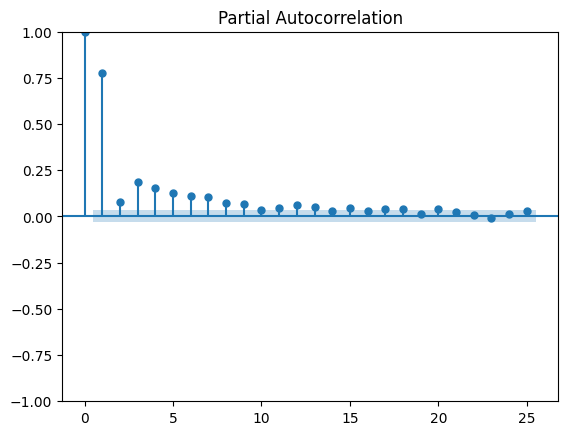

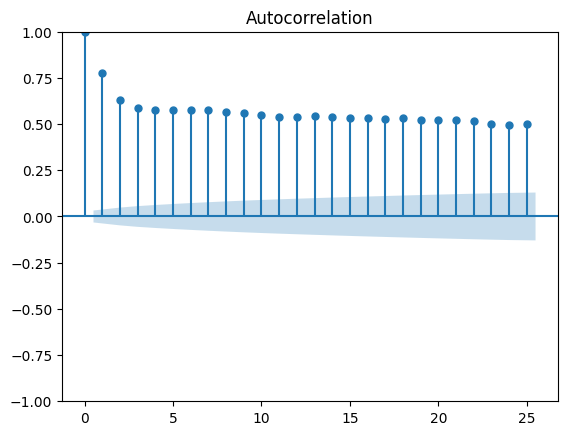

In [71]:
pacf = plot_pacf(df['temp'],lags=25)
acf = plot_acf(df['temp'], lags=25)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [73]:
x =df.values

In [74]:
x

array([[Timestamp('1981-01-01 00:00:00'), 20.7],
       [Timestamp('1981-01-02 00:00:00'), 17.9],
       [Timestamp('1981-01-03 00:00:00'), 18.8],
       ...,
       [Timestamp('1990-12-29 00:00:00'), 13.5],
       [Timestamp('1990-12-30 00:00:00'), 15.7],
       [Timestamp('1990-12-31 00:00:00'), 13.0]], dtype=object)

In [75]:
x=x[:,1:]

In [76]:
x

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13.0]], dtype=object)

In [77]:
train = x[:len(x)-7]
test = x[len(x)-7:]

In [81]:
len(train)

3643

In [82]:
len(test)

7

In [78]:
model = AutoReg(train, lags=10).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Tue, 03 Dec 2024   AIC                          16775.028
Time:                        23:50:08   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.000      -0.121      -0.045
y.L3           0.0631      0.019      3.246      0.001       0.025       0.101
y.L4           0.0512      0.019      2.632      0.008       0.013       0.089
y.L5           0.0547      0.019      2.810      0.005       0.017       0.093
y.L6           0.0422      0.019      2.166      0.030       0.004       0.080
y.L7           0.0590      0.019      3.032      0.002       0.021       0.097
y.L8           0.0324      0.019      1.664      0.096      -0.006       0.070
y.L9           0.0502      0.019      2.585      0.010       0.012       0.088
y.L10          0.0360      0.017      2.175      0.030       0.004       0.069
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0275           -0.0000j            1.0275           -0.0000
AR.2             0.9811           -0.7934j            1.2617           -0.1082
AR.3             0.9811           +0.7934j            1.2617            0.1082
AR.4             0.4192           -1.3007j            1.3665           -0.2004
AR.5             0.4192           +1.3007j            1.3665            0.2004
AR.6            -0.4338           -1.3906j            1.4567           -0.2981
AR.7            -0.4338           +1.3906j            1.4567            0.2981
AR.8            -1.3012           -0.8676j            1.5639           -0.4064
AR.9            -1.3012           +0.8676j            1.5639            0.4064
AR.10           -1.7501           -0.0000j            1.7501           -0.5000
------------------------------------------------------------------------------
"""

In [83]:
pred = model.predict(start = len(train), end = len(x)-1,dynamic=False)

In [84]:
pred

array([11.47679312, 12.63726604, 13.0574664 , 13.03378918, 12.8259307 ,
       12.65767226, 12.43273596])

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


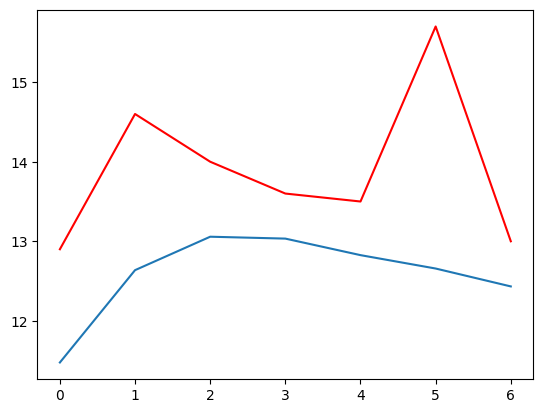

In [85]:
from matplotlib import pyplot as plt
plt.plot(pred)
plt.plot(test,color='red')
print(pred)

In [87]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))

In [88]:
rmse

1.5638196220860905

In [89]:
future_pred = model.predict(start = len(x)+1, end=len(x)+7,dynamic=False)
future_pred

array([12.28608804, 12.20309536, 12.24915916, 12.30618875, 12.31199689,
       12.27225975, 12.21843712])